In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)

2022-07-27 02:23:29.096403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 02:23:29.096447: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Pandas version:  1.4.3
Numpy version:  1.23.0


In [2]:
data=pd.read_csv('final_df.csv')
data.head()

,Unnamed: 0,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,NEAR_CEMETERY,NEAR_UNIVERSITY,NEAR_FIRESTATION,NEAR_FUEL,...,NEAR_MARKET,PARK_AREA,PARKING_AREA,TEMPLE_COUNT,NEAR_POLICE,NEAR_SCHOOL,NEAR_STATION,HOSPITAL_COUNT,CSTORE_COUNT,單價元平方公尺
0,0,37,3,2,2,1,0,1,0,0,...,1,19653.307239,13775.425698,8,0,1,1,56,25,245443
1,1,37,2,2,2,1,0,1,0,0,...,1,20919.333198,12957.853283,11,0,1,1,73,26,257275
2,2,36,5,4,2,1,0,1,1,0,...,1,23525.477676,27422.414906,14,0,1,1,66,19,314764
3,3,43,3,1,2,1,0,0,0,0,...,0,2238.024797,12636.293073,4,0,1,1,122,28,286978
4,4,35,5,3,4,0,0,1,0,0,...,1,12067.008462,6957.973273,9,1,1,0,44,10,228840


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.dtypes

屋齡                    int64
建物現況格局-房              int64
建物現況格局-廳              int64
建物現況格局-衛              int64
電梯                    int64
NEAR_CEMETERY         int64
NEAR_UNIVERSITY       int64
NEAR_FIRESTATION      int64
NEAR_FUEL             int64
NEAR_LIBRARY          int64
NEAR_MARKET           int64
PARK_AREA           float64
PARKING_AREA        float64
TEMPLE_COUNT          int64
NEAR_POLICE           int64
NEAR_SCHOOL           int64
NEAR_STATION          int64
HOSPITAL_COUNT        int64
CSTORE_COUNT          int64
單價元平方公尺               int64
dtype: object

In [4]:
train_data = data[25:175]
val_data = data[175:]
test_data = data[:25]

In [5]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data-mean)/std
val_data = (val_data-mean)/std

In [6]:
X_data = np.array(train_data[train_data.columns[0:20]])
y_data = np.array(train_data[train_data.columns[-1]]).reshape(len(train_data),1)
X_val = np.array(val_data[val_data.columns[0:20]])
y_val = np.array(val_data[val_data.columns[-1]]).reshape(len(val_data),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

(150, 20) <class 'numpy.ndarray'>
(150, 1) <class 'numpy.ndarray'>


In [7]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(14, activation='relu', input_shape=(20,))) 
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dense(1)) 

2022-07-27 02:23:30.369502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-27 02:23:30.369613: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 02:23:30.369636: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntuosmnx-virtual-machine): /proc/driver/nvidia/version does not exist
2022-07-27 02:23:30.369882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(keras.optimizers.Adam(0.001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])

In [9]:
model_mckp=keras.callbacks.ModelCheckpoint('test_model-1.h5',
monitor='val_mean_absolute_error',
save_best_only=True,
mode='min')

In [10]:
model_cbk=keras.callbacks.TensorBoard()
history = model.fit(X_data, y_data,
batch_size=14,  
epochs=300, 
validation_data=(X_val, y_val),  
callbacks=[model_cbk, model_mckp])

Epoch 1/300
11/11 [==============================] - 0s 15ms/step - loss: 1.6841 - mean_absolute_error: 0.9938 - val_loss: 1.1793 - val_mean_absolute_error: 0.9404
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 1.4447 - mean_absolute_error: 0.9195 - val_loss: 1.0068 - val_mean_absolute_error: 0.8788
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 1.2770 - mean_absolute_error: 0.8590 - val_loss: 0.8854 - val_mean_absolute_error: 0.8267
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 1.1435 - mean_absolute_error: 0.8131 - val_loss: 0.7886 - val_mean_absolute_error: 0.7800
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 1.0361 - mean_absolute_error: 0.7699 - val_loss: 0.7097 - val_mean_absolute_error: 0.7388
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 0.9456 - mean_absolute_error: 0.7379 - val_loss: 0.6442 - val_mean_absolute_error: 0.7022
Epoch 7/300
11/11 [==

In [11]:
import matplotlib.pyplot as plt

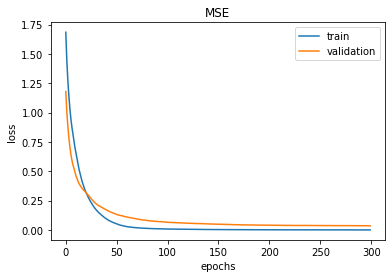

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')

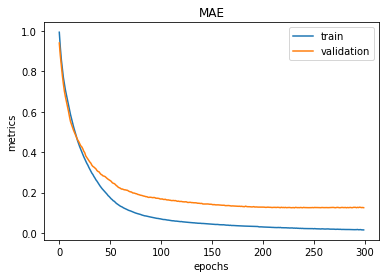

In [13]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('MAE')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='best')

In [14]:
model = keras.models.load_model('test_model-1.h5')
y_test = np.array(test_data[test_data.columns[-1]]).reshape(len(test_data),1)
test_data = (test_data - mean) / std
x_test = np.array(test_data[test_data.columns[0:20]])
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['單價元平方公尺'] + mean['單價元平方公尺'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model Percentage Error: {:.2f}%".format(percentage_error))

1/1 [==============================] - 0s 58ms/step
Model Percentage Error: 3.18%


In [15]:
print(y_test)
print(y_pred)

[[245443]
 [257275]
 [314764]
 [286978]
 [228840]
 [315266]
 [258118]
 [265969]
 [251708]
 [340426]
 [229647]
 [238686]
 [288344]
 [364282]
 [433213]
 [302590]
 [239253]
 [239544]
 [276318]
 [268408]
 [247941]
 [320190]
 [210852]
 [287067]
 [302640]]
[[252730.42]
 [256408.23]
 [342259.47]
 [287006.1 ]
 [257742.42]
 [312953.  ]
 [253604.62]
 [285700.9 ]
 [246358.78]
 [336606.  ]
 [227093.78]
 [236346.05]
 [263534.6 ]
 [347729.5 ]
 [435162.1 ]
 [306132.6 ]
 [233435.16]
 [247231.83]
 [279471.03]
 [243920.44]
 [252898.  ]
 [313627.06]
 [219281.28]
 [280825.97]
 [306624.2 ]]
